1. HARGA DATASET

Saving HARGA RUMAH JAKSEL OLD.xlsx to HARGA RUMAH JAKSEL OLD (2).xlsx
First few rows of the dataset:
         HARGA    LT   LB  JKT  JKM  GRS    KOTA
0  28000000000  1100  700    5    6  ADA  JAKSEL
1  19000000000   824  800    4    4  ADA  JAKSEL
2   4700000000   500  400    4    3  ADA  JAKSEL
3   4900000000   251  300    5    4  ADA  JAKSEL
4  28000000000  1340  575    4    5  ADA  JAKSEL

Cleaning data...

Handling missing values...
Missing values handled successfully.

Encoding categorical features...
Categorical features encoded successfully.

Normalizing data...
Data normalization complete.

Training Multiple Linear Regression...

Training Polynomial Regression...

Multiple Linear Regression Evaluation:
R-squared: 0.4851
MSE: 0.1775
RMSE: 0.4213

Polynomial Regression Evaluation:
R-squared: 0.4128
MSE: 0.2024
RMSE: 0.4499

Comparison of Model Performance:
Model		R-squared	MSE		RMSE
Linear		0.4851		0.1775	0.4213
Polynomial	0.4128		0.2024	0.4499


<ipython-input-13-8cd7981159eb>:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


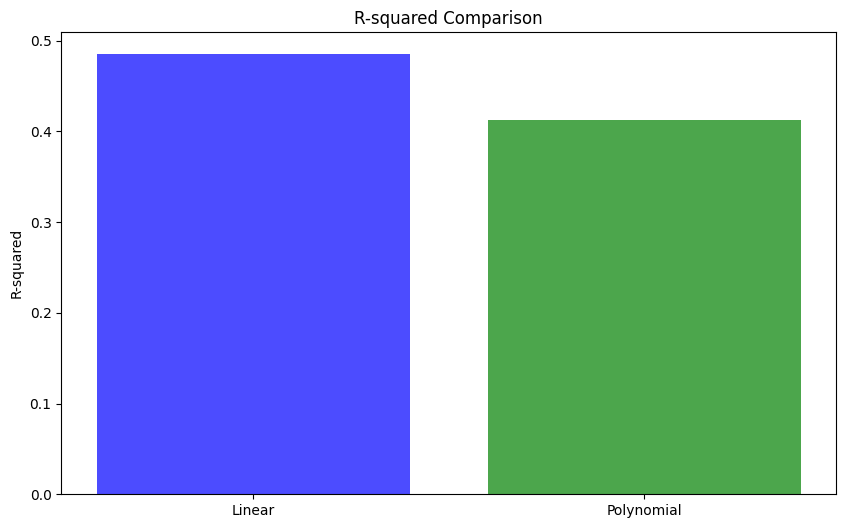

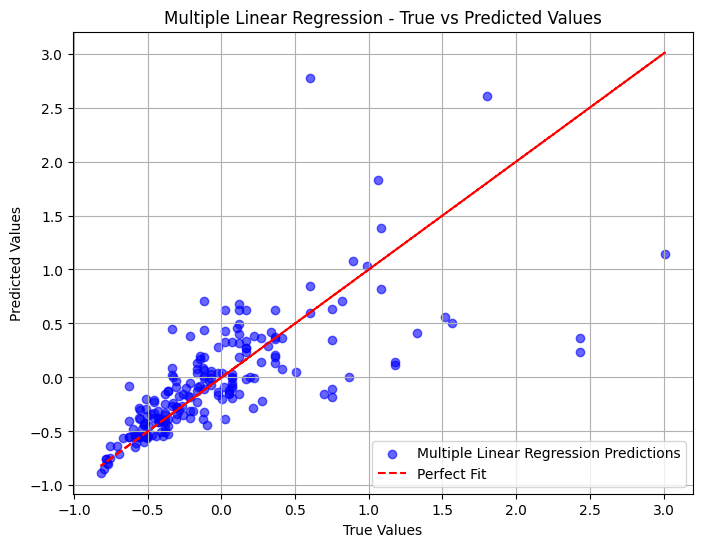

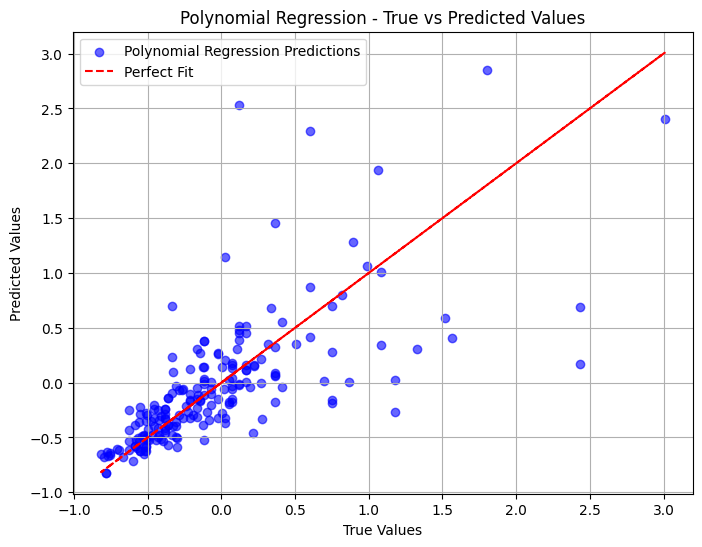

In [ ]:
# Install dependencies
!pip install pandas openpyxl scikit-learn matplotlib

# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from google.colab import files

# Upload dataset
uploaded = files.upload()

# Load the Excel file into a pandas DataFrame
file_name = list(uploaded.keys())[0]
data = pd.read_excel(file_name)

# Display first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Step 1: Clean the data
print("\nCleaning data...")

# Handle missing values
print("\nHandling missing values...")
imputer = SimpleImputer(strategy="mean")  # Replace NaN in numerical columns with mean
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['number']).columns

# Impute numerical columns
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])

# Impute categorical columns with most frequent value
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

print("Missing values handled successfully.")

# Step 2: Encode categorical features
print("\nEncoding categorical features...")
for col in categorical_cols:
    data[col] = data[col].astype(str)  # Ensure all are string
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Drop first to avoid multicollinearity
encoded_features = encoder.fit_transform(data[categorical_cols])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))
data = pd.concat([data.drop(columns=categorical_cols), encoded_df], axis=1)

print("Categorical features encoded successfully.")

# Step 3: Normalize numerical data
print("\nNormalizing data...")
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

print("Data normalization complete.")

# Step 4: Split data into features and target
target_column = 'HARGA'  # Replace 'HARGA' with your target column name
X = data_scaled.drop(columns=[target_column])
y = data_scaled[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Multiple Linear Regression
print("\nTraining Multiple Linear Regression...")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Polynomial Regression
print("\nTraining Polynomial Regression...")
poly = PolynomialFeatures(degree=2)  # Adjust the degree as needed
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
y_pred_poly = poly_model.predict(X_poly_test)

# Step 5: Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"\n{model_name} Evaluation:")
    print(f"R-squared: {r2:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    return r2, mse, rmse

r2_lr, mse_lr, rmse_lr = evaluate_model(y_test, y_pred_lr, "Multiple Linear Regression")
r2_poly, mse_poly, rmse_poly = evaluate_model(y_test, y_pred_poly, "Polynomial Regression")

# Step 6: Compare models
print("\nComparison of Model Performance:")
print(f"Model\t\tR-squared\tMSE\t\tRMSE")
print(f"Linear\t\t{r2_lr:.4f}\t\t{mse_lr:.4f}\t{rmse_lr:.4f}")
print(f"Polynomial\t{r2_poly:.4f}\t\t{mse_poly:.4f}\t{rmse_poly:.4f}")

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(["Linear", "Polynomial"], [r2_lr, r2_poly], color=["blue", "green"], alpha=0.7)
plt.title("R-squared Comparison")
plt.ylabel("R-squared")
plt.show()

# Step 7: Scatter plot function
def plot_predictions(y_true, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, color="blue", alpha=0.6, label=f"{model_name} Predictions")
    plt.plot(y_true, y_true, color="red", linestyle="--", label="Perfect Fit")
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{model_name} - True vs Predicted Values")
    plt.legend()
    plt.grid()
    plt.show()

# Scatter plot for Multiple Linear Regression
plot_predictions(y_test, y_pred_lr, "Multiple Linear Regression")

# Scatter plot for Polynomial Regression
plot_predictions(y_test, y_pred_poly, "Polynomial Regression")


2.A. TRAIN DATASET

Saving train.csv to train (1).csv
First few rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123  

<ipython-input-7-f311560d1f6f>:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


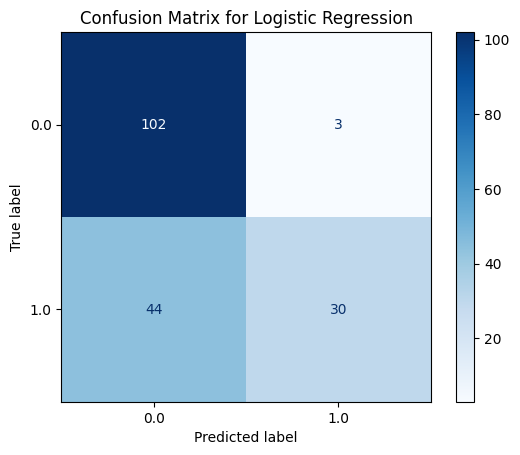


Training and evaluating k-Nearest Neighbors...
Accuracy: 0.4525
Precision: 0.4259
Recall: 0.9324
F1-score: 0.5847


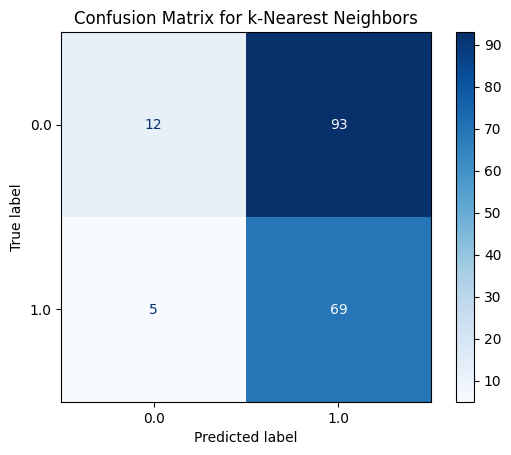


Training and evaluating Support Vector Machine...
Accuracy: 0.7430
Precision: 0.9118
Recall: 0.4189
F1-score: 0.5741


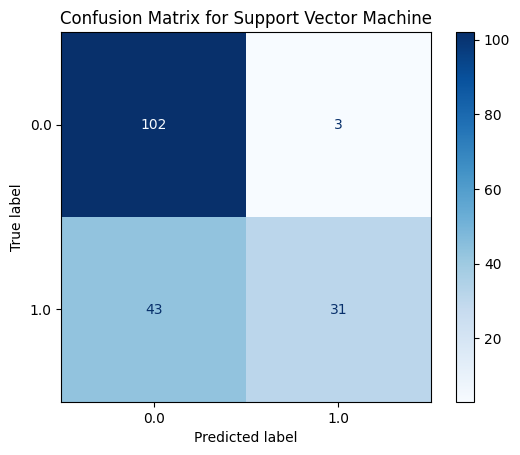

In [ ]:
# Install dependencies
!pip install pandas scikit-learn matplotlib seaborn

# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload dataset
uploaded = files.upload()

# Load the CSV file into a pandas DataFrame
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

# Display first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Preprocessing
print("\nPreprocessing data...")

# Handling missing values
print("\nHandling missing values...")
imputer = SimpleImputer(strategy='mean')  # For numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['number']).columns

# Impute numerical columns
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])

# Impute categorical columns with 'most_frequent'
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Encoding categorical features
print("\nEncoding categorical features...")
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(data[categorical_cols])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))
data = pd.concat([data.drop(columns=categorical_cols), encoded_df], axis=1)
print("Categorical features encoded successfully.")

# Splitting data into features and target
target_column = 'Survived'  # Change this to match your target column name
X = data.drop(columns=[target_column])
y = data[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize numerical data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
logistic_model = LogisticRegression(random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)
svm_model = SVC(kernel='linear', random_state=42)

# Train and evaluate models
models = {
    "Logistic Regression": logistic_model,
    "k-Nearest Neighbors": knn_model,
    "Support Vector Machine": svm_model
}

for model_name, model in models.items():
    print(f"\nTraining and evaluating {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()


Saving test.csv to test (10).csv
First few rows of the dataset:
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  

Handling missing values...
Missing values handled, and gender column encoded successfully.

Encoding categorical

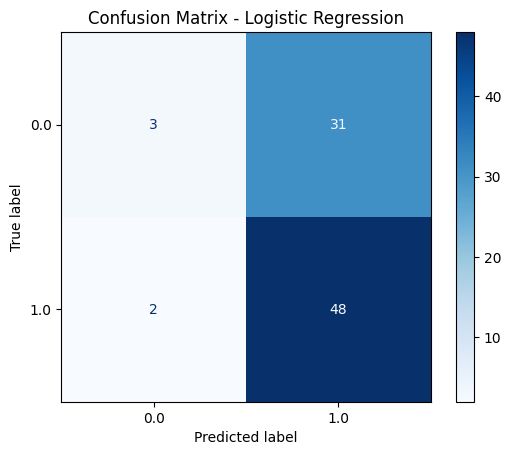


Training k-Nearest Neighbors...

k-Nearest Neighbors Evaluation:
Accuracy: 0.5952
Precision: 0.5952
Recall: 1.0000
F1-Score: 0.7463


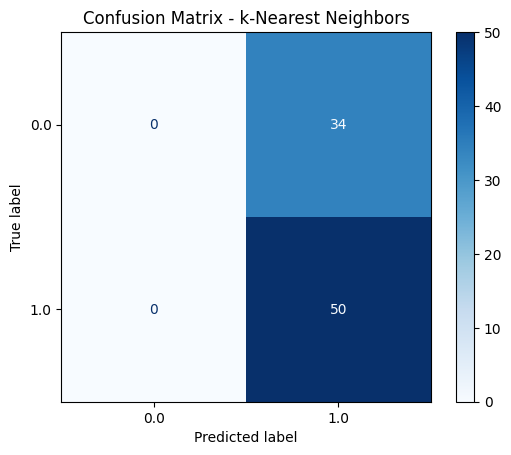


Training Support Vector Machine...

Support Vector Machine Evaluation:
Accuracy: 0.5952
Precision: 0.5952
Recall: 1.0000
F1-Score: 0.7463


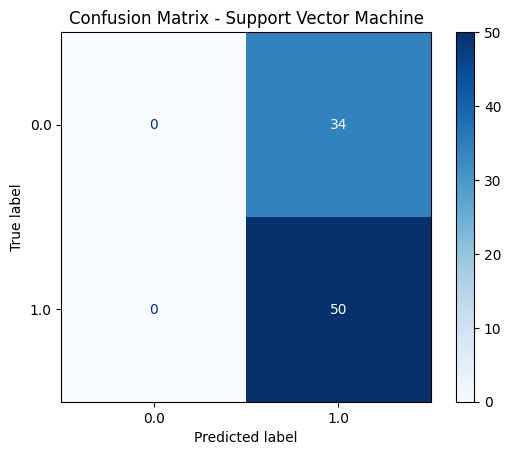

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload dataset
uploaded = files.upload()

# Load the CSV file into a pandas DataFrame
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

# Display first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Preprocessing
# Handle missing values
print("\nHandling missing values...")
name_column = 'Name'  # Replace 'Name' with the exact name of the column

# Separate the Name column if it exists
if name_column in data.columns:
    name_data = data[name_column]  # Separate the Name column
    data = data.drop(columns=[name_column])  # Drop the Name column temporarily
else:
    name_data = None

# Check for gender column and encode it (Male=1, Female=0)
gender_column = 'Sex'  # Replace 'Gender' with the exact column name for gender
if gender_column in data.columns:
    data[gender_column] = data[gender_column].map({'male': 1, 'female': 0})  # Use lowercase 'male' and 'female'

# Apply imputation to remaining numerical columns only
numerical_cols = data.select_dtypes(include=['number']).columns
imputer = SimpleImputer(strategy='mean')
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])

# Add the Name column back
if name_data is not None:
    data = pd.concat([data, name_data], axis=1)  # Concatenate name_data back to data

print("Missing values handled, and gender column encoded successfully.")


# Handle categorical data
print("\nEncoding categorical features...")
categorical_cols = data.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(data[categorical_cols])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))
data = pd.concat([data.drop(columns=categorical_cols), encoded_df], axis=1)
print("Categorical features encoded successfully.")

# Normalize numerical data
print("\nNormalizing data...")
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
print("Data normalization complete.")

# Split data into features and target
target_column = 'Sex'  # Replace 'target' with the name of your target column
X = data.drop(columns=[target_column])  # Use the original 'data' DataFrame
y = data[target_column]  # Use the original 'data' DataFrame for target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize numerical data (only apply to features, not the target)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Scale only the features
X_test = scaler.transform(X_test)  # Scale only the features
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "k-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC()
}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    print(f"\n{name} Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

Saving gender_submission.csv to gender_submission (1).csv
First few rows of the dataset:
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

Preprocessing data...

Handling missing values...

Encoding categorical features...
Categorical features encoded successfully.

Training and evaluating Logistic Regression...
Accuracy: 0.5952
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


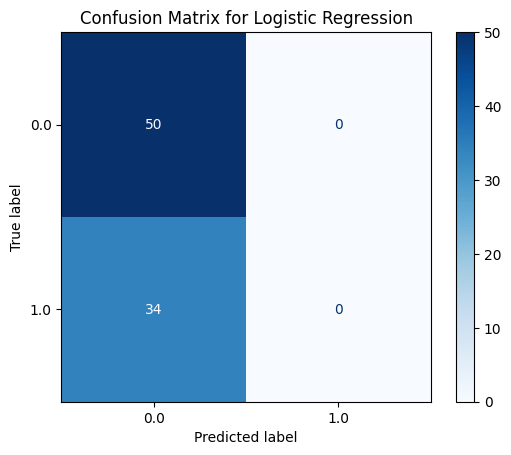


Training and evaluating k-Nearest Neighbors...
Accuracy: 0.6310
Precision: 0.6000
Recall: 0.2647
F1-score: 0.3673


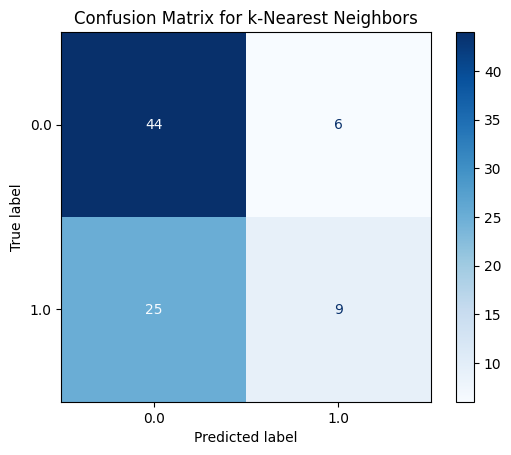


Training and evaluating Support Vector Machine...
Accuracy: 0.5952
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


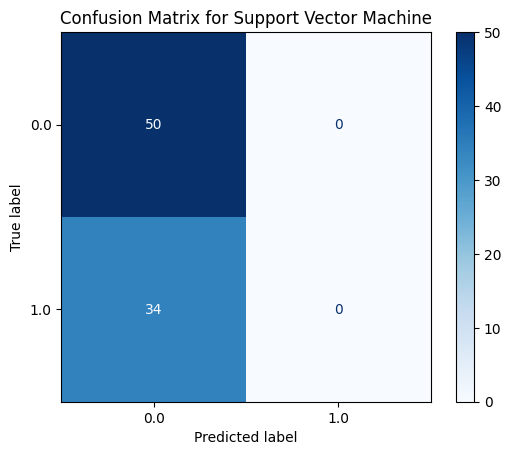

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload dataset
uploaded = files.upload()

# Load the CSV file into a pandas DataFrame
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

# Display first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Preprocessing
print("\nPreprocessing data...")

# Handling missing values
print("\nHandling missing values...")
imputer = SimpleImputer(strategy='mean')  # For numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['number']).columns

# Impute numerical columns
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])

# Impute categorical columns with 'most_frequent'
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Encoding categorical features
print("\nEncoding categorical features...")
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(data[categorical_cols])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))
data = pd.concat([data.drop(columns=categorical_cols), encoded_df], axis=1)
print("Categorical features encoded successfully.")

# Splitting data into features and target
target_column = 'Survived'  # Change this to match your target column name
X = data.drop(columns=[target_column])
y = data[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize numerical data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
logistic_model = LogisticRegression(random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)
svm_model = SVC(kernel='linear', random_state=42)

# Train and evaluate models
models = {
    "Logistic Regression": logistic_model,
    "k-Nearest Neighbors": knn_model,
    "Support Vector Machine": svm_model
}

for model_name, model in models.items():
    print(f"\nTraining and evaluating {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()
